In [ ]:
pip install pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cc = pd.read_csv("/content/climate_change_dataset.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cc.head()

,Year,Month,Avg_Temp (°C),Max_Temp (°C),Min_Temp (°C),Precipitation (mm),Humidity (%),Wind_Speed (m/s),Solar_Irradiance (W/m²),Cloud_Cover (%),CO2_Concentration (ppm),Latitude,Longitude,Altitude (m),Proximity_to_Water (km),Urbanization_Index,Vegetation_Index,ENSO_Index,Particulate_Matter (µg/m³),Sea_Surface_Temp (°C)
0,NaN,1.0,-3.460516,33.056918907353285,NaN,184.89969755743786,89.62081302618182,9.742885739415993,NaN,58.530797670209076,NaN,40.7128,NaN,10.0,15.0,NaN,0.04423782887418304,0.6336943092843479,33.43707805480527,18.545360112309588
1,2020.0,2.0,NaN,25.901916083791665,3.1739745975583844,2.957244192049635,95.17102000342224,10.64824600272703,252.3136442294677,32.85666516634471,419.595924,40.7128,-74.006,10.0,15.0,99999.000000,0.6128400325468267,NaN,24.504783135571934,15.909586979280654
2,2020.0,3.0,7.869842,18.63424149980029,10.42485208665568,NaN,NaN,NaN,247.39139984511084,29.380233637986674,416.650458,40.7128,-74.006,10.0,15.0,0.341732,0.4665653848003175,-0.4280583600093959,32.3274997743319,21.281093622177334
3,NaN,4.0,-0.049863,13.030562376875533,-9.196433418151315,102.4544605414934,Unknown,0.898697634212508,143.26161801322706,17.496855610388273,418.922808,40.7128,-74.006,10.0,15.0,0.896383,0.030465932726280065,-0.5707078659552114,20.496275820817043,NaN
4,2020.0,5.0,19.895067,35.88212887551623,20.067999652410148,185.72922332959365,73.99994640624561,13.128301152215258,169.5494376964624,2.1937104861995405,401.896588,40.7128,-74.006,10.0,99999.0,0.076173,NaN,-0.2861494705734404,22.64905691725084,15.502968235198333


In [ ]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        48 non-null     object 
 1   Month                       48 non-null     object 
 2   Avg_Temp (°C)               46 non-null     float64
 3   Max_Temp (°C)               46 non-null     object 
 4   Min_Temp (°C)               45 non-null     object 
 5   Precipitation (mm)          49 non-null     object 
 6   Humidity (%)                45 non-null     object 
 7   Wind_Speed (m/s)            51 non-null     object 
 8   Solar_Irradiance (W/m²)     48 non-null     object 
 9   Cloud_Cover (%)             49 non-null     object 
 10  CO2_Concentration (ppm)     47 non-null     float64
 11  Latitude                    47 non-null     object 
 12  Longitude                   50 non-null     object 
 13  Altitude (m)                49 non-nu

In [ ]:
# Replace text-based missing values with NaN
cc.replace(["NAN", "nan", "NaN", ""], np.nan, inplace=True)

# Convert numerical columns to appropriate data types
numeric_columns = [
    "Avg_Temp (°C)", "Max_Temp (°C)", "Min_Temp (°C)", "Precipitation (mm)",
    "Humidity (%)", "Wind_Speed (m/s)", "Solar_Irradiance (W/m²)", "Cloud_Cover (%)",
    "CO2_Concentration (ppm)", "Altitude (m)", "Proximity_to_Water (km)",
    "Vegetation_Index", "ENSO_Index", "Particulate_Matter (µg/m³)", "Sea_Surface_Temp (°C)"
]

for col in numeric_columns:
    cc[col] = pd.to_numeric(cc[col], errors='coerce')  # Convert to float, setting invalid entries to NaN

# Convert categorical columns properly
cc["Year"] = cc["Year"].astype(str)
cc["Month"] = cc["Month"].astype(str)

# Fill missing values with median (only for numeric columns)
cc[numeric_columns] = cc[numeric_columns].apply(lambda x: x.fillna(x.median()))

# Outlier detection and handling using IQR
def remove_outliers(df, column):
    if df[column].dtype in ['float64', 'int64']:  # Only apply to numeric columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])

for col in numeric_columns:
    remove_outliers(cc, col)

# Refill NaN values created by outlier removal
cc[numeric_columns] = cc[numeric_columns].apply(lambda x: x.fillna(x.median()))

# Save the cleaned dataset
cc.to_csv("/content/New_climate_change_dataset.csv", index=False)

print("Data preprocessing completed successfully.")

Data preprocessing completed successfully.


# after cleaning dataset

In [ ]:
cc1 = pd.read_csv("/content/New_climate_change_dataset.csv")

In [ ]:
cc1.head()

,Year,Month,Avg_Temp (°C),Max_Temp (°C),Min_Temp (°C),Precipitation (mm),Humidity (%),Wind_Speed (m/s),Solar_Irradiance (W/m²),Cloud_Cover (%),CO2_Concentration (ppm),Latitude,Longitude,Altitude (m),Proximity_to_Water (km),Urbanization_Index,Vegetation_Index,ENSO_Index,Particulate_Matter (µg/m³),Sea_Surface_Temp (°C)
0,NaN,1.0,-3.460516,33.056919,9.741354,184.899698,89.620813,9.742886,174.307589,58.530798,425.653185,40.7128,NaN,10.0,15.0,NaN,0.044238,0.633694,33.437078,18.545360
1,2020.0,2.0,10.422940,25.901916,3.173975,2.957244,95.171020,10.648246,252.313644,32.856665,419.595924,40.7128,-74.006,10.0,15.0,99999.000000,0.612840,0.094648,24.504783,15.909587
2,2020.0,3.0,7.869842,18.634241,10.424852,107.049930,69.735955,9.432287,247.391400,29.380234,416.650458,40.7128,-74.006,10.0,15.0,0.341732,0.466565,-0.428058,32.327500,21.281094
3,NaN,4.0,-0.049863,13.030562,-9.196433,102.454461,69.735955,0.898698,143.261618,17.496856,418.922808,40.7128,-74.006,10.0,15.0,0.896383,0.030466,-0.570708,20.496276,17.898958
4,2020.0,5.0,19.895067,35.882129,20.068000,185.729223,73.999946,13.128301,169.549438,2.193710,401.896588,40.7128,-74.006,10.0,15.0,0.076173,0.420027,-0.286149,22.649057,15.502968


In [ ]:
import pandas as pd

# Load original and cleaned datasetsb
original_df = pd.read_csv("/content/climate_change_dataset.csv")
cleaned_df = pd.read_csv("/content/New_climate_change_dataset.csv")

# Find differences
diff = original_df.compare(cleaned_df)

# Display differences
print("Differences between original and cleaned dataset:")
print(diff)


Differences between original and cleaned dataset:
   Month       Avg_Temp (°C)                  Max_Temp (°C)             \
    self other          self      other                self      other   
0    1.0   1.0           NaN        NaN  33.056918907353285  33.056919   
1    2.0   2.0           NaN  10.422940  25.901916083791665  25.901916   
2    3.0   3.0           NaN        NaN   18.63424149980029  18.634241   
3    4.0   4.0           NaN        NaN  13.030562376875533  13.030562   
4    5.0   5.0           NaN        NaN   35.88212887551623  35.882129   
5    6.0   6.0           NaN        NaN  16.815980053623928  16.815980   
6    7.0   7.0           NaN        NaN                 NaN  22.588835   
7    8.0   8.0           NaN        NaN  23.018365507255687  23.018366   
8    9.0   9.0           NaN        NaN   4.777629228981937   4.777629   
9   10.0  10.0           NaN        NaN   11.02265627885938  11.022656   
10  11.0  11.0           NaN        NaN   16.30946988855967  1

In [ ]:
print("Original Dataset Summary:\n", original_df.describe())
print("\nCleaned Dataset Summary:\n", cleaned_df.describe())


Original Dataset Summary:
        Avg_Temp (°C)  CO2_Concentration (ppm)  Urbanization_Index
count      46.000000                47.000000           50.000000
mean       13.018699               423.475586         4000.477221
std        11.557213                13.820859        19794.561777
min        -4.965473               400.351530            0.016689
25%         4.682635               412.434113            0.270233
50%        10.422940               425.653185            0.566592
75%        22.992501               436.739556            0.853385
max        34.282303               444.483466        99999.000000

Cleaned Dataset Summary:
            Month  Avg_Temp (°C)  Max_Temp (°C)  Min_Temp (°C)  \
count  47.000000      53.000000      53.000000      53.000000   
mean    5.936170      12.675863      23.081262       8.645496   
std     3.534945      10.787768       9.410022      11.080126   
min     1.000000      -4.965473       1.543655      -9.196433   
25%     3.000000       4.70

# Missinng Values comparision

In [ ]:
print("Missing values in original dataset:\n", original_df.isnull().sum())
print("\nMissing values in cleaned dataset:\n", cleaned_df.isnull().sum())


Missing values in original dataset:
 Year                          5
Month                         5
Avg_Temp (°C)                 7
Max_Temp (°C)                 7
Min_Temp (°C)                 8
Precipitation (mm)            4
Humidity (%)                  8
Wind_Speed (m/s)              2
Solar_Irradiance (W/m²)       5
Cloud_Cover (%)               4
CO2_Concentration (ppm)       6
Latitude                      6
Longitude                     3
Altitude (m)                  4
Proximity_to_Water (km)       6
Urbanization_Index            3
Vegetation_Index              3
ENSO_Index                    3
Particulate_Matter (µg/m³)    3
Sea_Surface_Temp (°C)         7
dtype: int64

Missing values in cleaned dataset:
 Year                          5
Month                         6
Avg_Temp (°C)                 0
Max_Temp (°C)                 0
Min_Temp (°C)                 0
Precipitation (mm)            0
Humidity (%)                  0
Wind_Speed (m/s)              0
Solar_Irradiance 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import plotly.express as px

# Load dataset
data = pd.read_csv('/content/climate_change_dataset.csv')

# Display basic info
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Drop missing values (or use imputation if necessary)
data.dropna(inplace=True)

# Convert 'Year' and 'Month' to datetime format
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(day=1))

# Drop redundant columns
data.drop(columns=['Year', 'Month'], inplace=True)

# Display first few rows
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        48 non-null     object 
 1   Month                       48 non-null     object 
 2   Avg_Temp (°C)               46 non-null     float64
 3   Max_Temp (°C)               46 non-null     object 
 4   Min_Temp (°C)               45 non-null     object 
 5   Precipitation (mm)          49 non-null     object 
 6   Humidity (%)                45 non-null     object 
 7   Wind_Speed (m/s)            51 non-null     object 
 8   Solar_Irradiance (W/m²)     48 non-null     object 
 9   Cloud_Cover (%)             49 non-null     object 
 10  CO2_Concentration (ppm)     47 non-null     float64
 11  Latitude                    47 non-null     object 
 12  Longitude                   50 non-null     object 
 13  Altitude (m)                49 non-nu

# Line Chart: Global Temperature Trends Over Time

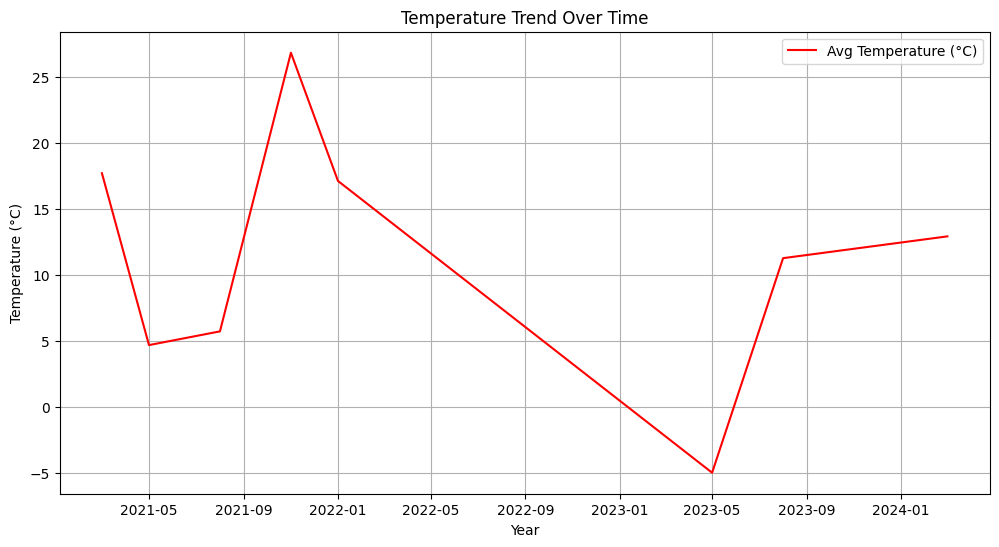

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['Date'], y=data['Avg_Temp (°C)'], color='red', label="Avg Temperature (°C)")
plt.title('Temperature Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()


# Bar Chart: CO₂ Emissions Over Time

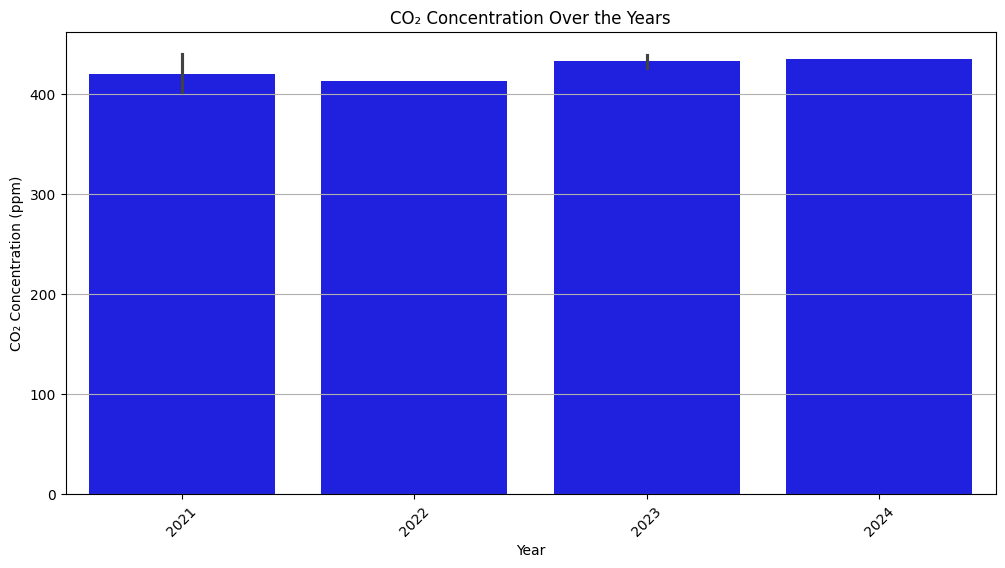

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=data['Date'].dt.year, y=data['CO2_Concentration (ppm)'], color='blue')
plt.title('CO₂ Concentration Over the Years')
plt.xlabel('Year')
plt.ylabel('CO₂ Concentration (ppm)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


#Scatter Plot: Relationship Between Temperature and CO₂

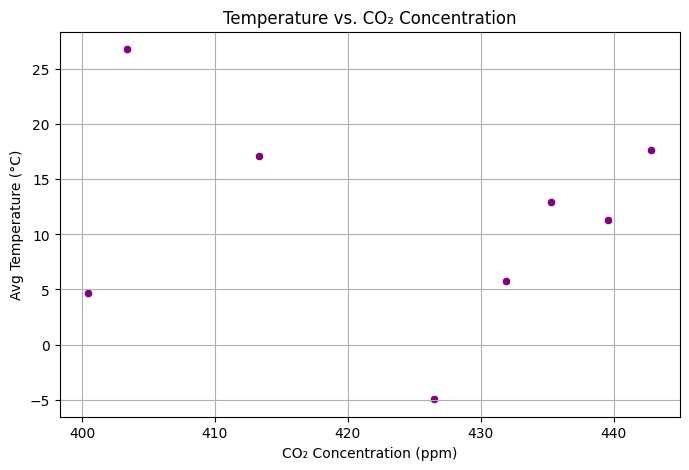

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['CO2_Concentration (ppm)'], y=data['Avg_Temp (°C)'], color='purple')
plt.title('Temperature vs. CO₂ Concentration')
plt.xlabel('CO₂ Concentration (ppm)')
plt.ylabel('Avg Temperature (°C)')
plt.grid(True)
plt.show()


#Heatmap: Correlation Between Climate Variables

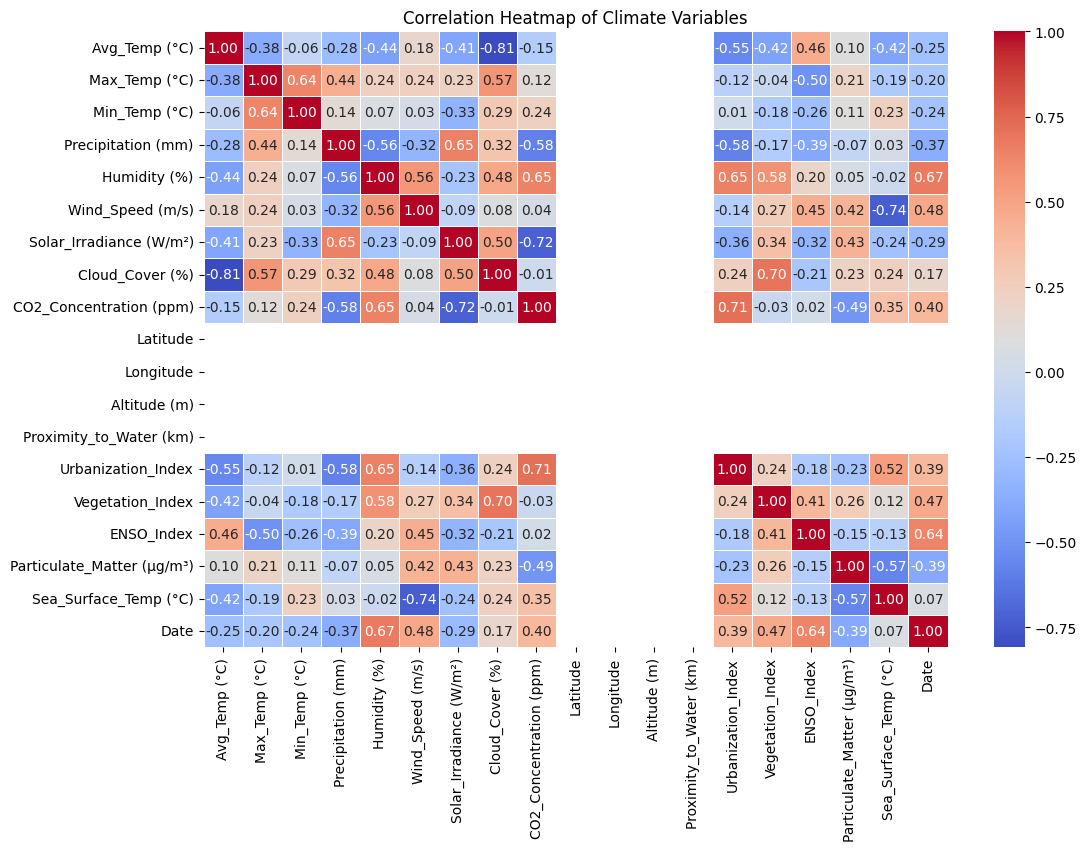

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Climate Variables')
plt.show()


# Interactive Plotly Visualizations

In [ ]:
fig = px.line(data, x='Date', y='Avg_Temp (°C)', title='Interactive Temperature Trends Over Time')
fig.show()


# Interactive Scatter Plot (Temperature vs. CO₂)

In [ ]:
fig = px.scatter(data, x='CO2_Concentration (ppm)', y='Avg_Temp (°C)',
                 title='Interactive Scatter Plot: Temperature vs CO₂',
                 color='Avg_Temp (°C)', size='CO2_Concentration (ppm)')
fig.show()


# Geospatial Mapping (if Latitude/Longitude is Available

In [ ]:
if 'Latitude' in data.columns and 'Longitude' in data.columns:
    fig = px.scatter_geo(data, lat='Latitude', lon='Longitude',
                         color='Avg_Temp (°C)',
                         title='Geospatial Distribution of Temperature')
    fig.show()


# Predict Future Trends

In [ ]:
pip install statsmodels

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Linear Regression for Temperature Prediction

Mean Squared Error (MSE): 388.9932089741351
R-squared (R²) Value: -15.680244523408817


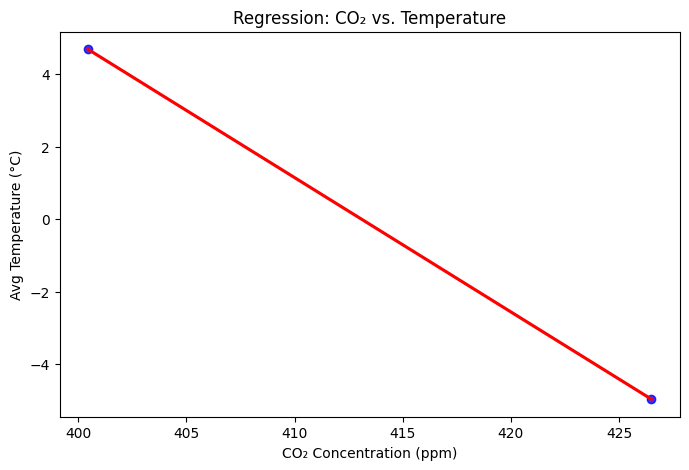

In [ ]:
# Define independent (X) and dependent (y) variables
X = data[['CO2_Concentration (ppm)']]
y = data['Avg_Temp (°C)']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict temperature values
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²) Value: {r2}")

# Plot regression results
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test, y=y_test, scatter_kws={'color':'blue'}, line_kws={'color':'red'}, ci=None)
plt.xlabel('CO₂ Concentration (ppm)')
plt.ylabel('Avg Temperature (°C)')
plt.title('Regression: CO₂ vs. Temperature')
plt.show()


 # Time-Series Forecasting Using ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer i

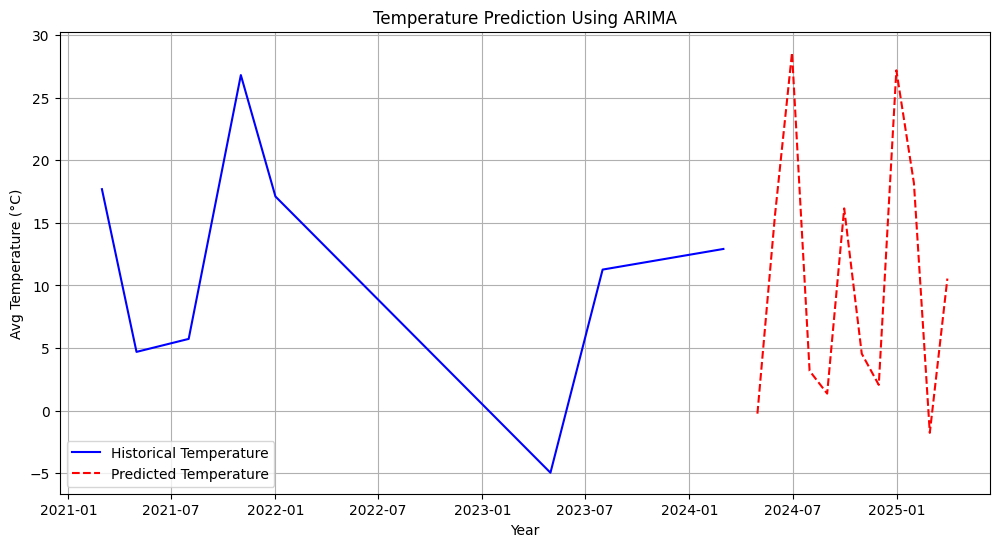

In [ ]:
# Convert Date to index for time-series modeling
data.set_index('Date', inplace=True)

# Define ARIMA model (AutoRegressive, Differencing, Moving Average)
model = ARIMA(data['Avg_Temp (°C)'], order=(5,1,0))  # (p,d,q) values can be tuned
model_fit = model.fit()

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)

# Generate future dates
future_dates = pd.date_range(start=data.index[-1], periods=13, freq='M')[1:]

# Create a DataFrame for forecasted values
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted_Temp (°C)': forecast.values})

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Avg_Temp (°C)'], label="Historical Temperature", color="blue")
plt.plot(forecast_df['Date'], forecast_df['Predicted_Temp (°C)'], label="Predicted Temperature", color="red", linestyle="dashed")
plt.xlabel('Year')
plt.ylabel('Avg Temperature (°C)')
plt.title('Temperature Prediction Using ARIMA')
plt.legend()
plt.grid(True)
plt.show()
